<img height="80" width="800" src="https://www.autojini.com/files/siteContent/editor/blog/automobileIndustry.jpg"></img>
### <font color='maroon' size= 6 align=middle><b> "Automobile Dataset-Deep Dive Analysis" </b></font>

## <font color ="crimson" size=5><b>"Agenda"</b></font>

1. [Reading the Datasets](#Datasets)<br>
    -1.1 [Reading the Datasets and importing all Packages](#Datasets)<br>
    -1.2 [Understanding the dataset and cleaning the datasets](#Cleaning)<br>
    -1.3 [Visualization](#Visualization)<br><br>
    
2. [Findings](#Finding)<br>
    

### 1.1 "Reading the Datasets and importing all Packages"<a id='Datasets'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Getting the Current Working Directory
os.getcwd()

#Changing the Working Directory so that the dataset is been fetched from that directory
os.chdir('D:/BigDataProjects/DataScience/Upx/Python_Learning_Tracks/Project/ProjectDatasets/Project_4_Automobile_data/Project_4_Automobile data')
print("The dataset file is present!! Good to Go!! ",os.listdir())

df_auto= pd.read_csv("Automobile_data.txt")

print("\nThe Total no of Rows and Column in Dataset are",df_auto.shape)
print("\nThe datasets are as follows")
df_auto.head(2)


The dataset file is present!! Good to Go!!  ['Automobile_data.txt']

The Total no of Rows and Column in Dataset are (205, 26)

The datasets are as follows


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### 1.2 Understanding the dataset and cleaning the datasets<a id="Cleaning">

In [2]:
# cleaning feature column "normalized-losses": If found,Replacing the null value with "mean value" of normalized-losses

nor_loss=df_auto['normalized-losses'].loc[df_auto['normalized-losses'] != '?']
nor_mean=nor_loss.astype(str).astype(int).mean()

df_auto['normalized-losses']=df_auto['normalized-losses'].replace('?',nor_mean)
df_auto['normalized-losses']=df_auto['normalized-losses'].astype(int)


In [3]:
# describing the Feature variable and finding their corelation
#df_auto.describe(include='all')

In [4]:
#Preprocessing the Price Feature column for better Interpretation
df_auto['price'][df_auto['price']=='?'].count()
price_mean=df_auto['price'][df_auto['price']!='?'].astype(str).astype(int).mean()
df_auto['price']=df_auto['price'].replace('?',price_mean).astype(int)

In [5]:
df_auto=df_auto.fillna(0)

In [6]:
#Preprocessing the horsepower Feature column for better Interpretation
df_auto['num-of-doors']=df_auto['num-of-doors'].replace('?',np.nan)

In [7]:
df_auto['horsepower'][df_auto['horsepower']=='?'].count()
horse_pow_mean=df_auto['horsepower'][df_auto['horsepower']!='?'].astype(str).astype(int).mean()
df_auto['horsepower']=df_auto['horsepower'].replace('?',horse_pow_mean).astype(int)

### 1.3 Visualization <a id="Visualization">

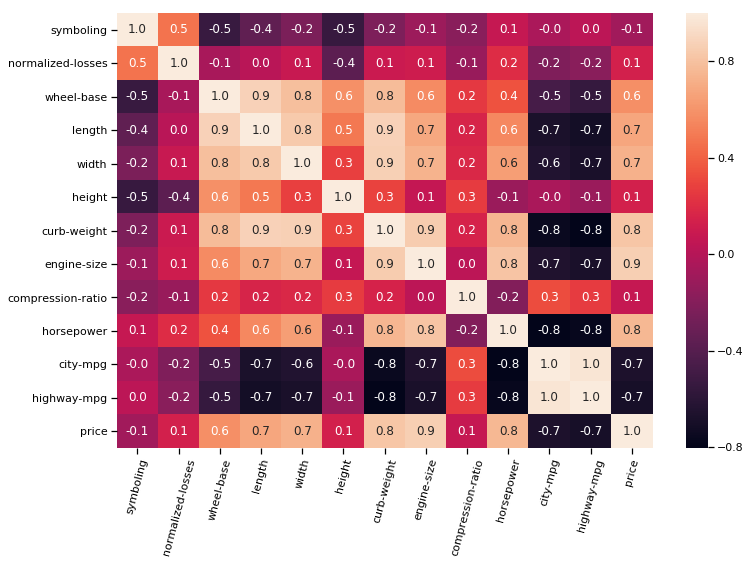

In [33]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.yticks(rotation=30)
#sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.heatmap(df_auto.corr(),annot=True,fmt='.1f')


<P/>
<h3/><u>Findings from Correlation heatmap Matrix</u></h3>

1.Price is more correlated with engine size and curb weight of the car><br>
2.Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car<br>
Wheel base is highly correlated with length and width of the car<br>

And Vice-Versa
<p/>


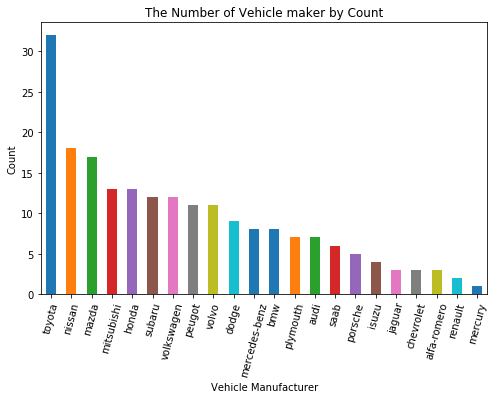

In [8]:
%matplotlib inline
Count_make=df_auto['make'].value_counts()
plt.figure(figsize=(8,5))
plt.title("The Number of Vehicle maker by Count")
plt.xlabel("Vehicle Manufacturer")
plt.ylabel("Count")
Count_make.plot(kind='bar')
plt.xticks(rotation=75)
plt.show()

### Comparision of Fuel Type Distribution across Vehicle maker with respect to price and No of Door of Vehicle

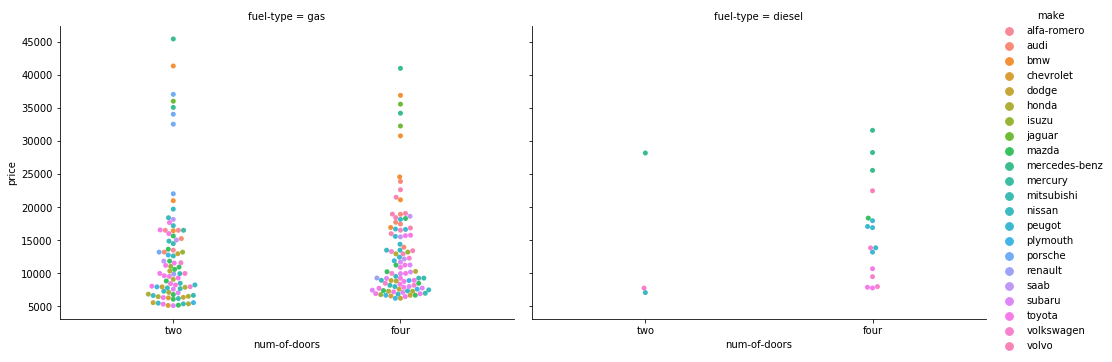

In [16]:

sns.catplot(x='num-of-doors',y='price',col='fuel-type',hue='make',data=df_auto[df_auto.notnull()], kind='swarm',aspect=1.4)

### % Distribution Fuel Type of Automobile Datasets

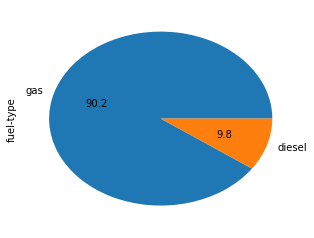

In [10]:
df_auto['fuel-type'].value_counts().plot.pie(figsize=(5,4),autopct='%.1f')

### Horse Power Distribution 

C:\Users\Mowgli\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'HorsePower Distribution')

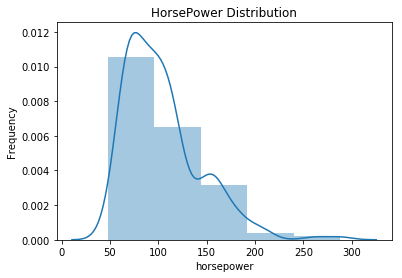

In [20]:
df_auto['horsepower']=df_auto['horsepower'].astype(int)
sns.distplot(df_auto['horsepower'],bins=5,kde=True)
plt.ylabel('Frequency')
plt.title('HorsePower Distribution')

### curb-weight Distribution Graphs

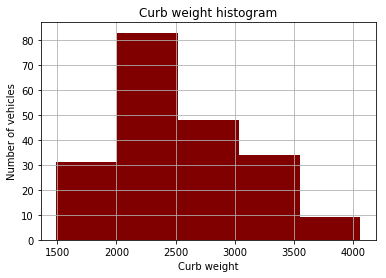

In [23]:

df_auto['curb-weight'].hist(bins=5,color='maroon');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

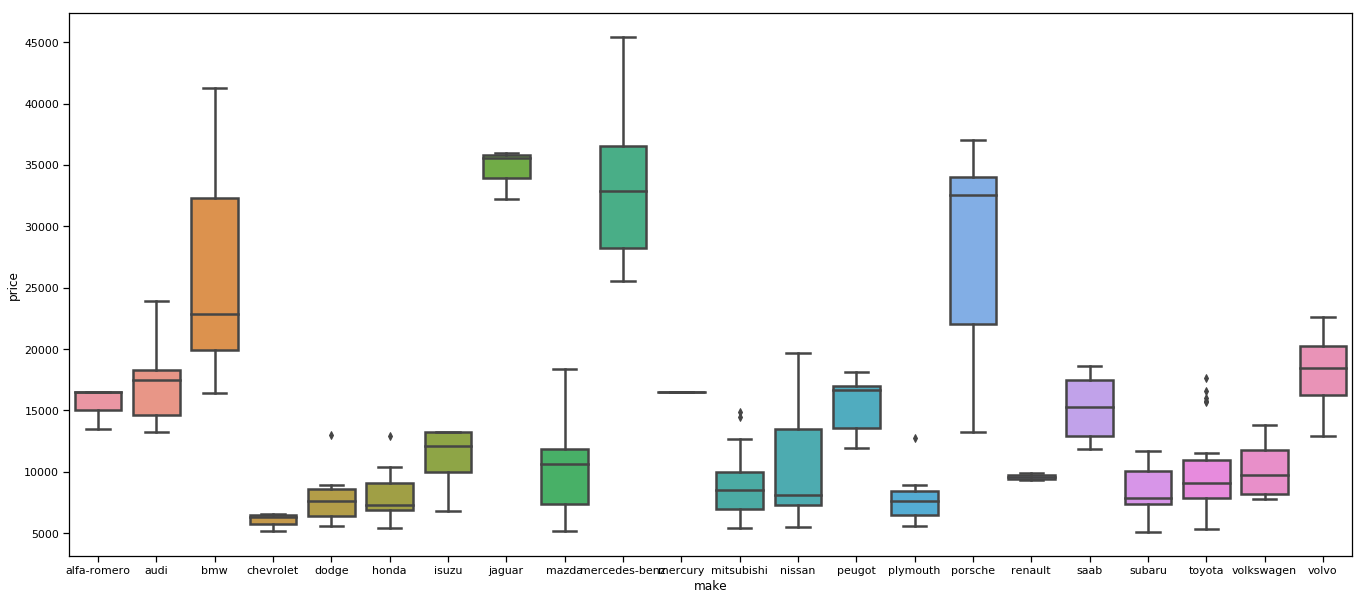

In [35]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df_auto)

### Showing with the Plot: Linear Relation between the Feature Columns
#### The Graphs Shows Bigger the Engine Size More is the Cost

C:\Users\Mowgli\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


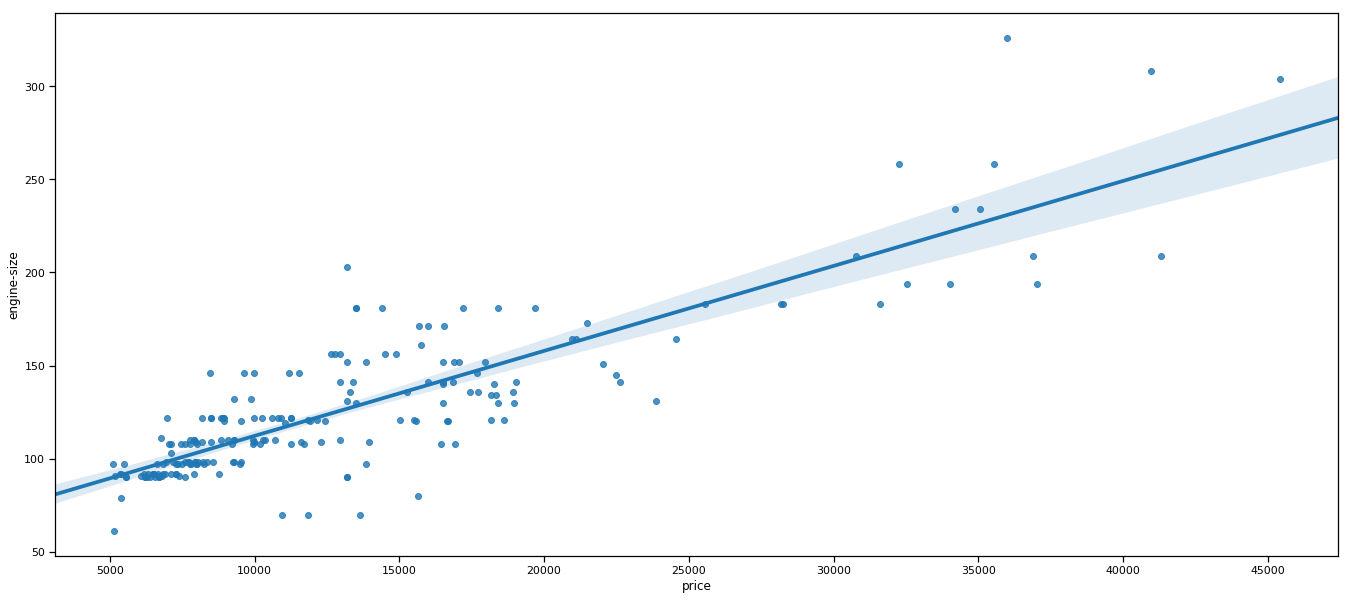

In [39]:
sns.regplot('price',"engine-size", df_auto)

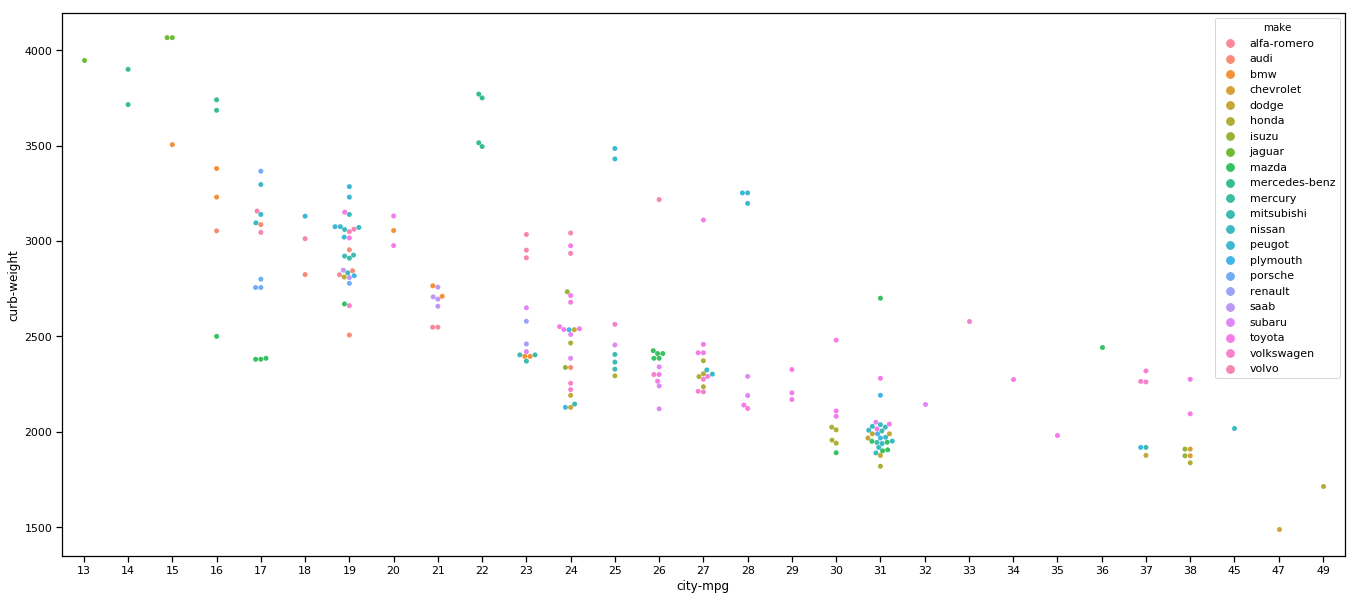

In [54]:
plt.rcParams['figure.figsize']=(23,10)
sns.swarmplot(x='city-mpg',y="curb-weight", data=df_auto, hue="make")

### Drive wheels Comparision with Price: Boxplot Representaion
Real wheel drive cars are most expensive and front wheel is least expensive cars.<br>
Four wheel drive cars are little higher than the front wheel drive cars. 


<Figure size 1440x720 with 0 Axes>

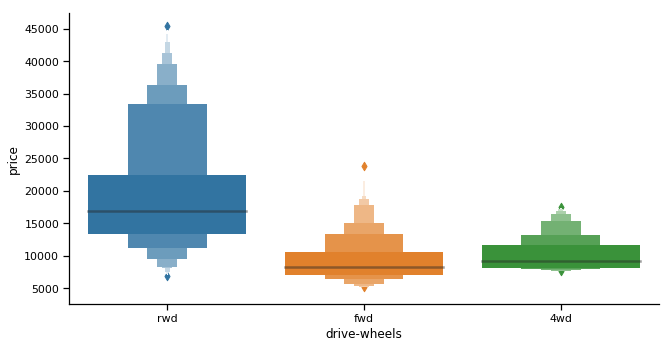

In [61]:
plt.figure(figsize=(20,10))
sns.catplot(x="drive-wheels", y="price", data=df_auto,kind='boxen',aspect=1.9)

## 2. Finding<a id="Finding">

<P/>
<h3><u>The following are some finding of automobile dataset for analysis.</h3></u>

1.Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan<br><br>
2.Most of the vehicle of fuel type is of Gas with total of 90.2% as compare to Disel which is of 8.8%<br><br> 
3.Curb weight of the cars are distributed between 1500 and 4000 approximately.Maximum no of vehicle having curbweight between 2000 to 2500<br><br>
4.From the boxplot, we have the following findings for  vehicle maker vs price of the car<br>
     ##4.1 The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet<br>
     ##4.2 The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche<br>
     ##4.3 Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru<br>
     ##4.4 Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars<br><br>
5.The Graphs Shows Bigger the Engine Size More is the Cost<br>

<P/>